# DDA 3020 Assignment 3: Fully-Connected Neural Networks and CNN

Before we start, please put your name and ID in following format:

Firstname LASTNAME, #00000000   //  e.g.) Justin JOHNSON, #12345678



# Your Answer

Boshi Xu, #122040075

# Overview

In this exercise, we are going to build a **fully-connected neural network** and a **convolutional neural network** from scratch using **numpy** package.

For **Fully-connected Neural Network**, you need to implement both forward and backward part to train your model and update the parameters.

For **Convolutional Neural Network**, you only need to implement the forward part, including `convolutional layers`, `max_pooling` and `fully-connected layers`. Functions of implementing backpropagation are given. Please check the input requirements for those functions, especially pay attention to the dimension.

Please follow the guidance and finish the **<font color="green">[To Do]</font>** and **<font color="red">[Task]</font>** part. Please feel free to define your own functions or modify the functions given if needed. No writing report is required and you will get the mark if the whole process and results are reasonable.

If you meet any package or memory issues that can't be solved, feel free to use this colab script to finish your task (remember to copy your own one instead of modifying this colab script directly) : https://colab.research.google.com/drive/1AdGyiVYosU2uMBQ9ahx5B7ZOmH8zEQg_?usp=drive_link

# Set Up Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Fully-connected Neural Network

# 1.1 Loading Datasets

In this assignment, we mainly adopt the FashionMnist dataset to train our network. You will be given two csv files: **fashion-mnist_train.csv; fashion-mnist_test.csv**, containing 60000 and 10000 samples each. Each sample is a 28 * 28 grayscale image. In the csv file, each row represents a sample with dimension 1 * 784 (28*28). The first step of this assignment is loading our data. Please run the below cells and a visualization code is also given.

In [2]:
# run it only when you use colab to do this assignment
# no need to run it if you do this assignment locally
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
mnist_train = pd.read_csv('fashion-mnist_train.csv') # change the path to your own path
mnist_test = pd.read_csv('fashion-mnist_test.csv') # change the path to your own path

In [4]:
# check the shape of of the training data 检查形状
print(mnist_train.shape)

(60000, 785)
(60000, 785)


In [5]:
# convert the dataset into training set and testing set
# for each pixel, the purpose of dividing it by 255 is to scale its value between 0 and 1 since the maximun value is 255
# for testset, since its label is a number, we first transform it into one-hot vector
# 将数据集转换为训练集和测试集
# 对于每个像素，将其除以 255 的目的是将其值缩放在 0 和 1 之间，因为最大值为 255
# 对于测试集，由于它的标签是数字，我们首先将其转换为one-hot向量

X_train, Y_train = mnist_train.drop('label',axis=1)/255, mnist_train['label']
X_test, Y_test = mnist_test.drop('label',axis=1)/255, mnist_test['label']
Y_train, Y_test = pd.get_dummies(Y_train),pd.get_dummies(Y_test)

# you can check the first 10 samples of the training set
X_train.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.019608,0.015686,0.019608,0.019608,0.011765,0.019608,0.023529,...,0.027451,0.031373,0.027451,0.015686,0.011765,0.027451,0.019608,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.011765,0.007843,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.796078,0.839216,0.650980,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.019608,0.015686,0.019608,0.019608,0.011765,0.019608,0.023529,...,0.027451,0.031373,0.027451,0.015686,0.011765,0.027451,0.019608,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.011765,0.007843,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.796078,0.839216,0.650980,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [6]:
# here is a function of reshaping the 1*784 vector into 28*28 matrix (the original format of a grayscale image)
# 将1*784向量 变成28*28矩阵（灰度图像的原始格式）的函数
def reshape_data(X_train, X_test):
  train_size, test_size = X_train.shape[0], X_test.shape[0]
  reshape_train, reshape_test = np.transpose(X_train,(1,0)), np.transpose(X_test,(1,0))
  reshape_train, reshape_test = reshape_train.reshape((28,28,1,train_size)), reshape_test.reshape((28,28,1,test_size))
  return np.transpose(reshape_train,(3,0,1,2)), np.transpose(reshape_test,(3,0,1,2))

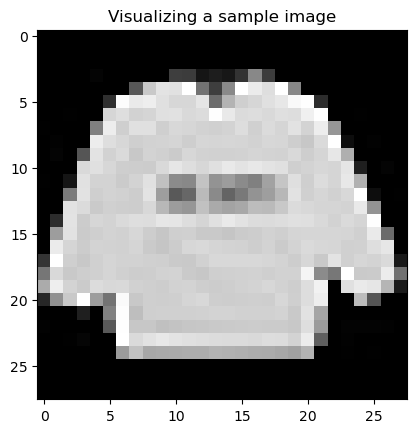

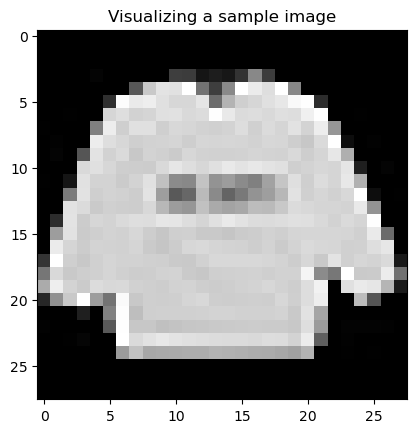

In [7]:
# here is a visualization cell that you can check the data sample from FashionMnist

x_train_sample, x_test_sample = reshape_data(X_train.values, X_test.values)
y_train_sample, y_test_sample = Y_train.values, Y_test.values
sample_image = x_train_sample[0,:, :, :].squeeze()

# plot the figure
plt.imshow(sample_image, cmap='gray')
plt.title("Visualizing a sample image")
plt.show()

# 1.2 Implement Fully-connected Neural Network

In this exercise, we will implement a simple **three layer fully-connected neural network** from scratch using only **numpy** package. The NN contains one input layer with 784 nodes (dimension of the input data), one hidden layer with 128 nodes, and one output layer with 10 nodes (10 types of labels). For the first two layers, we will use `relu` as our activation function. The output layer will use `softmax` activation function. The loss for this multi-label prediction task is chosen as softmax-cross-entropy



Firstly, we initialize all the parameters using the given functions. We provide an example of using this function. You can modify the function if needed (like changing the dimension etc.).

In [8]:
def initialize_parameters(layer_dims):
    '''
    initialize all the parameters, including weights and bias

    Inputs:
    - layer_dims: a list containing the number of nodes in each layer

    Example:
    - if you want to build a two layer neural network
    - the number of nodes in each layer is 20, 10
    - then use the function like: para = initialize_parameters([20,10])
    - para['W1'] is the weight matrix from layer 1 to layer 2 with dimension (10 * 20)
    - you can modify the output dimension if you need

    初始化所有参数，包括权重和偏差

    输入：
    - layer_dims：包含每层节点数的列表

    例子：
    - 如果你想构建一个两层神经网络
    - 每层节点数为20、10
    - 然后使用如下函数： para = initialize_parameters([20,10])
    - para['W1'] 是从第 1 层到第 2 层的权重矩阵，维度为 (10 * 20)
    - 如果需要，您可以修改输出尺寸

    '''

    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

    return parameters

# 1.2.1 Activation functions and Loss functions

In this section, you will implement different functions, including `relu`, `softmax` and `cross entropy loss`. The formulas are listed below for reference.

---
*   $\text{ReLU}(z) = \max(0, z)$ \\
*   $\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$
*   $L = -\sum_{c=1}^{K} y_c \log(\hat{y}_c)$, where $y_c$ is the ground truth labels, $\hat{y}_c$ is the prediced labels



---

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below three functions.



In [9]:
def relu(Z):
  '''
  the ReLU activation function

  Inputs:
  - Z: the computed results before activation (e.g. WX+b)

  Outputs:
  - A: the result after activation

  '''

  A = None

  ######################################################################
  # TODO: Implement the ReLU Functions              #
  ######################################################################
  # Replace pass with your code
  A = np.maximum(0, Z)
  ######################################################################
  #         END OF YOUR CODE               #
  ######################################################################

  return A


def softmax(Z):

  '''
  the softmax activation function

  Inputs:
  - Z: the computed results before activation (e.g. WX+b)

  Outputs:
  - A: the result after activation
  softmax函数又称归一化指数函数，是基于 sigmoid 二分类函数在多分类任务上的推广
  在多分类网络中，常用 Softmax 作为最后一层进行分类。

  '''

  #A = None

  ######################################################################
  # TODO: Implement the softmax Function             #
  ######################################################################
  # Replace pass with your code
  exps = np.exp(Z) 
  ######################################################################
  #         END OF YOUR CODE               #
  ######################################################################

  return(exps / np.sum(exps, 0))


def compute_loss(A, Y):

  '''
  the softmax activation function

  Inputs:
  - A: the output result after softmax, the dimension is [10, batch_size]
  - Each row of A is a probability vector, A[0,0] represents the probability of the first sample belonging to label 0
  - Y: the groundtruth label, the dimension is [10, batch_size]

  Outputs:
  - L: the computed loss
  这里的 L 表示损失函数的值，Y 通常是一个真实的标签向量（在多类分类问题中常为 one-hot 编码形式），
  而 A 是模型输出的预测概率（softmax 函数的输出）
  损失函数衡量的是预测概率分布与真实概率分布之间的差异。
  在机器学习中，优化算法（如梯度下降）会使用这个损失函数的值来更新模型的权重，
  目标是最小化这个损失，从而使预测概率尽可能接近真实标签的分布

  '''
  L = None

  ######################################################################
  # TODO: Implement the Loss Function               #
  ######################################################################
  # Replace pass with your code
  n = Y.shape[1] #这里 n 是 Y 的第二维度的大小，即样本数（假设每一列代表一个样本）。这一步获取样本数量是为了后续将总损失除以样本数，从而计算平均损失
  epsilon = 1e-10 #数值稳定性，防止出现log(0)
  L = -np.sum(Y * np.log(A + epsilon))/n 
  ######################################################################
  #         END OF YOUR CODE               #
  ######################################################################

  return L



# 1.2.2 Forward Propagation

In this section, you need to implement the `forward_propagation` function. Each time you propagate from one layer to the next layer, two steps are needed:


1.   Multiply the values in the current nodes with the weight matrix and add the bias terms
2.   Use the activation function to activate the results

In our setting, we have three layers, so we need to propogate our training data twice to get the final prediction results.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.



In [10]:
def forward_propagation(X, parameters):

    '''
    将当前节点中的值与权重矩阵相乘并添加偏差项
    使用激活函数激活结果
    Inputs:
    - X: the training data, with dimension [784,batch_size]
    - parameters: a dictionary that contains all the parameters define

    Outputs:
    - A2: the result of the last layer
    - cache: a tuple that stores the propagation results for later backpropagation process

    '''
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']


    Z1 = None
    A1 = None
    Z2 = None
    A2 = None

    ######################################################################
    # TODO: Implement the forward propagation            #
    ######################################################################
    # Replace pass with your code

    # First Layer
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)
    
    # Second Layer
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)
    ######################################################################
    #         END OF YOUR CODE               #
    ######################################################################


    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    return A2, cache

# 1.2.3 Backpropagation

In this section, we will implement the backpropagation process by completing the `relu_derivative` and `backward_propagation` functions.

When doing the backpropagation, we mainly use chain rule to compute the gradient. Below is an example that helps you understand this process:

Suppose we have two layers, we have the input data $X$, weight matrix $W$, forward result (without activation) $Z$, activation function $σ$, forward result (after activation) $A$, ground truth label $Y$ and Loss $L(Y,A)$. And we have the below relationships:

$Z = WX$

$A = σ(Z)$

If you wanna compute the gradient of the weight matrix, the formula is:

$\frac{dL}{dW} = \frac{dL}{dA}\frac{dA}{dZ}\frac{dZ}{dW} = \frac{dL}{dA}\frac{dA}{dZ} × X$, and $\frac{dL}{dA}$, $\frac{dA}{dZ}$ can be directly computed according to your loss function and activation function.

When implement this function, recall that we have stored the forward result and parameters in the cache. Please fully use these infomation to do your backpropagation.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

In [11]:
def relu_derivative(Z):
    '''
    Inputs:
    - Z: the value before activation

    Outputs：
    - dZ： the derivative of relu function
    '''
    dZ = np.array(Z, copy=True)

    ######################################################################
    # TODO: Implement the relu vackward              #
    ######################################################################
    # Replace pass with your code
    pass
    ######################################################################
    #         END OF YOUR CODE               #
    ######################################################################

    return dZ

def backward_propagation(parameters, cache, X, Y):
    '''
    Implement the backward propagation process for our 3 layer NN
    Here are several steps you need to do:
    1. dZ2: Compute the gradient of Cross Entropy Loss and Softmax Function
    2. dW2: Compute the gradient of the weight matrix from hidden layer to output layer
    3. db2: Compute the gradient of the bias term from hidden layer to output layer
    4. dA2: Compute the gradient of the ReLU activation
    ...

    Inputs:
    - paramters: a dictionary containing all the parameters
    - cache: a tuple that store all the forward propagation results
    - X: training data, dimension of [784, batch_size]
    - Y: ground truth label, dimension of [10, batch_size]

    Outputs:
    - grads: a dictionary containing all the computed gradients
    '''
    m = X.shape[1] # batch_size
    Z1, A1, W1, b1, Z2, A2, W2, b2 = cache # load the forward results

    dZ2, dW2, db2, dA2, dZ1, dW1, db1 = None, None, None, None, None, None, None

    ######################################################################
    # TODO: Implement the backward propagation           #
    ######################################################################
    # Replace pass with your code
    dZ2 = A2 - Y  # 交叉熵损失函数对输出层输入的导数
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # ReLU 激活函数的导数
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    ######################################################################
    #         END OF YOUR CODE               #
    ######################################################################

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

# 1.2.4 Update Parameters

Now, we have finished the backward propagation and get all the computed gradients. We can use the computed gradients to update all the parameters using gradient descent methods.

In [12]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2  # number of layers

    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

    return parameters

# 1.2.5 Training our NN

In the previous section, we successfully implement the `forward` and `backward` part of NN. Now we can combine all the elements together and train our neural network.

In real training process, we don't feed all the data into the neural network at one epoch. Instead, we divide the dataset into small batches and update the parameters using just a small batch of data each time. The introduction of small bacth can reduce the memory load and increase the randomness, which can facilitate the training process and increase the generalization capability of our model. Below we provide two functions that can devide the training set and testing set into small batches.

In [13]:
# 将训练集和测试集分成小批量。
# 以减少内存负载并增加随机性，这可以促进训练过程并增加我们模型的泛化能力
def create_train_batches(X, Y, batch_size):
    '''
    Inputs:
    - X: training data, dimension [784, 60000]
    - Y: ground truth label. dimension [10, 60000]
    - batch_size: the size of each batch

    Outputs:
    - mini_batches: a list containing all the data divided into different batches
    '''
    m = X.shape[1]  # number of data; (60000)
    mini_batches = []

    # shuffle all the data
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]

    # divide the data into batch
    num_complete_minibatches = m // batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*batch_size : (k+1)*batch_size]
        mini_batch_Y = shuffled_Y[:, k*batch_size : (k+1)*batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    # deal with the last batch (may not equal to the batch_size)
    if m % batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches*batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*batch_size :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

def create_test_batches(X, batch_size):
    '''
    Inputs:
    - X: testing data, dimension [784, 10000]
    - batch_size: the size of each batch

    Outputs:
    - mini_batches: a list containing all the data divided into different batches
    '''
    mini_batches = []
    m = X.shape[1]  # number of data, (10000)
    n_batches = m // batch_size

    for i in range(n_batches):
        X_mini = X[:, i*batch_size:(i+1)*batch_size]
        mini_batches.append(X_mini)

    if m % batch_size != 0:
        X_mini = X[:, n_batches*batch_size:]
        mini_batches.append(X_mini)

    return mini_batches

Before training our NN, we need to define a `model_predict` function to predict the labels of the data samples, which can be further used to compute the prediction accuracy.

**Hint 1**: Since our data are seperated into small batches, you need to predict the labels of data in each batch and then concatenate them together to the final predictions

**Hint 2**: Recall that output result of our NN is a one-hot probability vector for each data sample. You should convert them into a single label

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

In [14]:
# 定义一个model_predict函数来预测数据样本的标签，该函数可以进一步用于计算预测精度

def model_predict(X_test, parameters, batch_size):
    mini_batches = create_test_batches(X_test, batch_size) # 创建测试批次
    all_predictions = [] # a list containing the prediction result of each small batch 初始化预测列表

    for X_mini in mini_batches: # 循环处理每个批次
      ######################################################################
      # TODO: predict the results for each small batch       #
      ######################################################################
      # Replace pass with your code
      # 预测每个批次中数据的标签
      A2, _ = forward_propagation(X_mini, parameters)
      predictions = np.argmax(A2, axis=0)
      # 将它们连接在一起以得到最终的预测
      all_predictions.append(predictions)


      ######################################################################
      #         END OF YOUR CODE               #
      ######################################################################

    all_predictions = np.concatenate(all_predictions, axis=0)
    return all_predictions

Finally, we can train our NN. You should following the below training steps to train your NN for each small batch in each iteration :



*   Do the **Forward Propagation** to get the forward results
*   Compute the **Loss** based on the forward results
*   Do the **Backward Propagation** to compute all the gradients
*   Update all the parameters

After iteration all the small batches, you should calculate the accuracy for both training data and testing data in this iteration.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.


In [15]:
def train(X_train, Y_train, X_test, Y_test, layers_dims, learning_rate, num_iterations, batch_size):
    # initialize the parameters
    parameters = initialize_parameters(layers_dims)

    # training iterations
    for i in range(0, num_iterations):

        # create the small batches
        mini_batches = create_train_batches(X_train, Y_train, batch_size)

        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch

            ######################################################################
            # TODO: finish the training process              #
            ######################################################################
            # Replace pass with your code
            # 进行前向传播以获得前向结果
            A2, cache = forward_propagation(mini_batch_X, parameters)
            # 根据前向结果计算损失
            cost = compute_loss(A2, mini_batch_Y)
            # 进行反向传播来计算所有梯度
            grads = backward_propagation(parameters, cache, mini_batch_X, mini_batch_Y)
            # 更新所有参数
            parameters = update_parameters(parameters, grads, learning_rate)
            ######################################################################
            #         END OF YOUR CODE               #
            ######################################################################

        # acc of training
        all_predictions = model_predict(X_train, parameters, batch_size)
        train_labels = np.argmax(Y_train, axis=0)
        train_acc = np.mean(all_predictions == train_labels)

        # predict
        all_predictions = model_predict(X_test, parameters, batch_size)
        test_labels = np.argmax(Y_test, axis=0)
        test_acc = np.mean(all_predictions == test_labels)

        # print cost and acc
        print ("Cost after iteration %i: %f | Training Accuracy: %f | Test Accuracy: %f" %(i+1, cost, train_acc, test_acc))

    return parameters

In [16]:
# run this script to train you NN

x_train = X_train.values.T # reshape it into [784,60000]
y_train = Y_train.values.T
x_test = X_test.values.T
y_test = Y_test.values.T

# origin: para = train(x_train , y_train, x_test, y_test, layer_dims = [784,128,10], learning_rate = 0.01, num_iterations = 20, batch_size = 256)
para = train(x_train , y_train, x_test, y_test, layers_dims = [784,128,10], learning_rate = 0.01, num_iterations = 20, batch_size = 256)

Cost after iteration 1: 1.599456 | Training Accuracy: 0.571717 | Test Accuracy: 0.565100
Cost after iteration 1: 1.599456 | Training Accuracy: 0.571717 | Test Accuracy: 0.565100
Cost after iteration 2: 1.378225 | Training Accuracy: 0.642100 | Test Accuracy: 0.633100
Cost after iteration 2: 1.378225 | Training Accuracy: 0.642100 | Test Accuracy: 0.633100
Cost after iteration 3: 0.996275 | Training Accuracy: 0.671183 | Test Accuracy: 0.668400
Cost after iteration 3: 0.996275 | Training Accuracy: 0.671183 | Test Accuracy: 0.668400
Cost after iteration 4: 1.624986 | Training Accuracy: 0.693500 | Test Accuracy: 0.693300
Cost after iteration 4: 1.624986 | Training Accuracy: 0.693500 | Test Accuracy: 0.693300
Cost after iteration 5: 1.144761 | Training Accuracy: 0.715783 | Test Accuracy: 0.715700
Cost after iteration 5: 1.144761 | Training Accuracy: 0.715783 | Test Accuracy: 0.715700
Cost after iteration 6: 0.864555 | Training Accuracy: 0.733583 | Test Accuracy: 0.732100
Cost after iteration 

# Convolutional Neural Network

In this exercise, we are going to implement a convoutional neural network from scratch using numpy. The network structure is shown as below:

*   `conv_layer`: 32 2*2 convolutional kernels; stride = 1;
*   `max_pooling`: 2*2 pooling window; stride = 2;
*   `fully-connected layers`: 3 two connected layers, each with n_flatten, 64, 10 nodes. `n_flatten` represents the dimension of the flattened pooling result

You will be asked to implement the `forward` part, including `conv_forward`, `pool_forward` and `linear_forward`. The backward part and training process are given. If needed, you can also modify those given functions to align with your implementation.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

# 2.1 Forward Propagation

In [17]:
def conv_forward(A_prev, W, b, stride):
    """
    Implement the forward of conv layers (with bias)

    Inputs:
    - A_prev: The activation output from the previous layer, with dimension of (m, n_H_prev, n_W_prev, n_C_prev)
    - (1) m is the batch size (2) n_H_prev is the height of previous output
    - (3) n_W_prev is the width of the previous output (4) n_C_prev is the number of channels from the previous output

    - W: The weight of the conv kernel，with dimension of: (f, f, n_C_prev, n_C)
    - (1) f is the size of the kernel (2) n_C is the number of the conv kernels

    - b: The bias term with dimension of (1, 1, 1, n_C)
    - stride: A integer represents how far the conv kernel moves each time


    Outputs:
    - Z: The conv result, with dimension of (m, n_H, n_W, n_C)
    - A_prev, W, b, stride

    """

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C) = W.shape

    #####################################################################################
    # TODO: Compute the height and weight of the output after convolution  #
    # Replace None with your formula                       #
    #####################################################################################
    # 计算卷积操作后输出特征图的高度和宽度
    # 高度/宽度 方向上扫过的最大范围 除以 步数， 加1是因为从输入的起始位置（index 0）开始计数，需要包括这一位置在内的卷积操作
    n_H = (n_H_prev - f)//stride + 1
    n_W = (n_W_prev - f)//stride + 1


    # initialize the output
    Z = np.zeros((m, n_H, n_W, n_C))


    #####################################################################################
    # TODO: Implement the convolutional process                  #
    # Hint: You can use a for loop to iterate all samples, H, W, C    #
    #####################################################################################

    for i in range(m): 
        for h in range(n_H): 
            for w in range(n_W): 
                for c in range(n_C): 
                    # 起始和结束位置
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    vert_start = h * stride 
                    vert_end = vert_start + f
                    
                    # 切片来提取子矩阵
                    # 样本num 垂直方向切片段 水平方向切片段
                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    #a_slice_prev 中包含的是输入特征图的局部数据，
                    # W[:, :, :, c] 是对应于输出特征图第 c 通道的卷积核。这个卷积核将遍历输入特征图，以生成输出特征图的一个元素
                    #对结果矩阵的所有元素求和。这一步实质上是完成了卷积操作，即加权和。
                        # 通过对所有元素求和，将这个卷积核与局部输入的所有对应元素进行加权，得到一个单一的数值，
                        # 这个数值代表了在输出特征图的位置 (h, w) 上，通道 c 的激活值。
                    # 最后将计算得到的加权和加上一个偏置值， 更好拟合数据
                    Z[i, h, w, c] = np.sum(a_slice_prev * W[:, :, c]) + b[0, 0, 0, c]

    #####################################################################################
    #             End of Your Code                   #
    #####################################################################################


    assert(Z.shape == (m, n_H, n_W, n_C))

    return Z, A_prev, W, b, stride

In [18]:
def pool_forward(A_prev, f, stride):
    """
    Inputs:
    - A_prev: The activation output from the previous layer, with dimension of (m, n_H_prev, n_W_prev, n_C_prev)
    - (1) m is the batch size (2) n_H_prev is the height of previous output
    - (3) n_W_prev is the width of the previous output (4) n_C_prev is the number of channels from the previous output

    - f: Integer, the height and width of the pooling windows
    - stride: Integer, indicate how far the pooling move each time

    Outputs:
    - A: The output of the pooling layers, with dimension of (m, n_H, n_W, n_C)
    - A_prev, f, stride, n_H, n_W, n_C

    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    #####################################################################################
    # TODO: Compute the height and weight of the output after convolution  #
    # Replace None with your formula                       #
    #####################################################################################
    n_H = (n_H_prev - f)//stride + 1
    n_W = (n_W_prev - f)//stride + 1
    n_C = n_C_prev

    # initialize the output
    A = np.zeros((m, n_H, n_W, n_C))

    #####################################################################################
    # TODO: Implement the Pooling process                     #
    # Hint: You can use a for loop to iterate all samples, H, W, C    #
    
    for i in range(m):
        for j in range(n_H):
            for k in range(n_W):
                for l in range(n_C):
                    horiz_start = k * stride
                    horiz_end = horiz_start + f
                    vert_start = j * stride
                    vert_end = vert_start + f
        
                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, l]                  
                    A[i , j , k , l] = np.max(a_slice_prev)
    
    
    #####################################################################################
    #####################################################################################
    #             End of Your Code                   #
    #####################################################################################

    assert(A.shape == (m, n_H, n_W, n_C))


    return A, A_prev, f, stride, n_H, n_W, n_C

In [19]:
def fully_connected_forward(A_prev, W, b):
    """
    Inputs:
    - A_prev: activation output from the last layer，with a dimension of (batch_size, # of nodes in last layer)
    - W: Weigh Matrix, with a dimension of (# of nodes in last layer, # of nodes in this layer)
    - b: Bias Term, with a dimension of (# of nodes in this layer, 1)

    Outputs:
    - Z: The output result without activation
    """

    Z = None
    #####################################################################################
    # TODO: Implement the fc forward process                   #
    #####################################################################################
   
    
    Z = np.dot(A_prev, W) + b

    #####################################################################################
    #             End of Your Code                   #
    #####################################################################################

    return Z, W, b


In [20]:
def cnn_forward(X, parameters):

    cache = []

    # First Conv
    Z1, A0, W1, b1, s1 = conv_forward(X, parameters['W1'], parameters['b1'], stride=1)
    A1 = relu(Z1)

    # Max Pooling
    P1, A1, f, s2, H2, W2, C2 = pool_forward(A1, f=2, stride=2)

    # Flatten
    P1_flattened = P1.reshape(P1.shape[0], -1)

    # FC Layers 1
    Z2, W3, b3 = fully_connected_forward(P1_flattened, parameters['W2'], parameters['b2'])
    A2 = relu(Z2)

    # FC Layers 2
    Z3, W4, b4 = fully_connected_forward(A2, parameters['W3'], parameters['b3'])
    A3 = softmax(Z3)

    # conv cache --> pooling cache --> fc 1 cache --> fc 2 cache
    cache.append((Z1, A0, W1, b1, s1))
    cache.append((P1, A1, f, s2, H2, W2, C2))
    cache.append((Z2, P1_flattened, W3, b3))
    cache.append((Z3, A2, W4, b4))

    return A3, cache


# Backpropagation

In [21]:
def relu_backward(dA, cache):
    Z, A_prev, W, b = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def conv_backward(dZ, cache):
    (Z, A_prev, W, b, stride) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C) = W.shape
    (m, n_H, n_W, n_C) = dZ.shape

    # initialize the gradients
    dA_prev = np.zeros_like(A_prev)
    dW = np.zeros_like(W)
    db = np.zeros_like(b)

    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    # localize the current slice
                    x_start = h * stride
                    x_end = x_start + f
                    y_start = w * stride
                    y_end = y_start + f
                    a_slice = a_prev[x_start:x_end, y_start:y_end, :]

                    # compute the gradients
                    dA_prev[i, x_start:x_end, y_start:y_end, :] += (W[:, :, c] * dZ[i, h, w, c]).reshape(2,2,1)
                    dW[:, :, c] += (a_slice * dZ[i, h, w, c]).reshape(2,2)
                    db[:, :, :, c] += dZ[i, h, w, c]

    # compute the bias gradients
    db = np.sum(dZ, axis=(0, 1, 2), keepdims=True) / m

    return dA_prev, dW, db


def create_mask_from_window(x):
    mask = x == np.max(x)
    return mask

def pool_backward(dA, cache):
    (P, A_prev, f, stride, n_H, n_W, n_C) = cache
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    bs = dA.shape[0]
    dA = dA.reshape(bs ,n_H ,n_W ,n_C) # unflatten

    dA_prev = np.zeros_like(A_prev)

    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    x_start = h * stride
                    x_end = x_start + f
                    y_start = w * stride
                    y_end = y_start + f
                    a_prev_slice = a_prev[x_start:x_end, y_start:y_end, c]
                    mask = create_mask_from_window(a_prev_slice)
                    dA_prev[i, x_start:x_end, y_start:y_end, c] += mask * dA[i, h, w, c]
    return dA_prev

def distribute_value(dz, shape):
    (n_H, n_W) = shape
    average = dz / (n_H * n_W)
    a = np.ones(shape) * average
    return a

def linear_backward(dZ, cache):
    Z, A_prev, W, b= cache
    m = A_prev.shape[0]
    dW = 1./m * np.dot(A_prev.T, dZ)
    db = 1./m * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ,W.T)
    return dA_prev, dW, db

def cnn_backward(AL, Y, caches):

    gradients = {}

    # compute the gradient of the output layer dAL which uses the softmax activation
    dAL = AL - Y


    # backward of the second fc
    current_cache = caches[-1]
    gradients["dA2"], gradients["dW3"], gradients["db3"] = linear_backward(dAL, current_cache)

    # backward of the relu function + the first lc
    current_cache = caches[-2]
    dZ = relu_backward(gradients["dA2"], current_cache)
    gradients["dA1"], gradients["dW2"], gradients["db2"] = linear_backward(dZ, current_cache)
    # print(gradients["dW2"].shape)

    # backward of max pooling --> relu --> backward of conv
    current_cache = caches[-3]
    dA0 = pool_backward(gradients["dA1"], current_cache)

    Z1, A0, W1, b1, s1 = caches[0]
    current_cache = (Z1, A0, W1, b1)
    dZ = relu_backward(dA0, current_cache)

    current_cache = caches[0]
    gradients["dA0"], gradients["dW1"], gradients["db1"] = conv_backward(dZ, current_cache)

    return gradients

# Update Parameters

In [22]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2  # number of layers

    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    return parameters


# Creating Batch Data

In [23]:
def create_minibatches(X, Y, minibatch_size):

    m = X.shape[0]
    minibatches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :, :, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // minibatch_size

    for k in range(0, num_complete_minibatches):
        minibatch_X = shuffled_X[k * minibatch_size:(k + 1) * minibatch_size, :, :, :]
        minibatch_Y = shuffled_Y[k * minibatch_size:(k + 1) * minibatch_size, :]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)

    if m % minibatch_size != 0:
        minibatch_X = shuffled_X[num_complete_minibatches * minibatch_size:, :, :, :]
        minibatch_Y = shuffled_Y[num_complete_minibatches * minibatch_size:, :]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)

    return minibatches

# Training Your CNN

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part to complete the training process

In [24]:
# The first step is initializing the parameters

parameters = {}

# Initilalize the parameters of conv kernels
parameters['W' + str(1)] = np.random.randn(2, 2, 16) * np.sqrt(2/68)
parameters['b' + str(1)] = np.zeros((1, 1, 1, 16))


#############################################################################################################
# TODO: Based on the network structure, compute the dimension of the flatten pooling result  #
# Replaced None with your computed result                               #
##############################################################################################################
# 13*13*16
n_L_prev = 2704


# Initialize the paramters of the FC Layers
parameters['W' + str(2)] = np.random.randn(n_L_prev, 64) * np.sqrt(2 / (n_L_prev + 64))
parameters['b' + str(2)] = np.zeros((1,64))
parameters['W' + str(3)] = np.random.randn(64, 10) * np.sqrt(2 / (64+10))
parameters['b' + str(3)] = np.zeros((1,10))

In [25]:
def predict_accuracy(X, Y, parameters):
    probas, caches = cnn_forward(X, parameters)
    predicted_labels = np.argmax(probas, axis=1)
    true_labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy

def train_cnn(X_train, Y_train, X_test, Y_test, parameters, learning_rate=0.001, num_epochs=100, batch_size=64):

    costs = []  # list that stores cost

    for i in range(num_epochs):
        mini_batches = create_minibatches(X_train, Y_train, batch_size)
        cost_total = 0

        for minibatch in mini_batches:
            (minibatch_X, minibatch_Y) = minibatch

            ######################################################################
            # TODO: finish the training process              #
            ######################################################################
            # Replace pass with your code
            probas, caches = cnn_forward(minibatch_X, parameters)
            
            # 计算损失函数
            cost = compute_loss(probas, minibatch_Y)
            cost_total += cost
            
            # 反向传播
            grads = cnn_backward(probas, minibatch_Y, caches)
            
            # 更新参数
            parameters = update_parameters(parameters, grads, learning_rate)
            
            ######################################################################
            #         END OF YOUR CODE               #
            ######################################################################

        cost_avg = cost_total / len(mini_batches)
        costs.append(cost_avg)

        # Print the Accuracy

        test_accuracy = predict_accuracy(X_test, Y_test, parameters)
        print(f"Epoch {i+1}/{num_epochs}, Cost: {cost_avg}, Test Accuracy: {test_accuracy}")

    return parameters, costs

In [26]:
# get all the training and testing data
x_train, x_test = reshape_data(X_train.values, X_test.values)
y_train, y_test = Y_train.values, Y_test.values

Run this cell to train you CNN. Since we use Numpy to implement CNN from scratch, the training speed may not be fast. Therefore, when testing your data, you can use a very small dataset to verify all your codes run well. For example, you can use 20 training samples and 1 test samples. After that, you can use a larger subset of the dataset to present your results.

Since this CNN is trained on a subset of the whole dataset, you get the marks if the result is reasonable.

**Reference**: Using 1000 training samples and 100 testing samples for 5 epochs will take like 40mins in TA's vanilla implementation; Using 100 training samples and 10 testing samples for 5 epochs will take 3-5 mins. It's normal that the model becomes overfitting if you only use small subset of dataset.

In [ ]:
# Replace all the None to the subset of the dataset
x_train_subset = x_train[:200]
y_train_subset = y_train[:200]
x_test_subset = x_test[:100]     
y_test_subset = y_test[:100]
para, cost = train_cnn(x_train_subset, y_train_subset, x_test_subset, y_test_subset, parameters, learning_rate=0.002 , num_epochs=10, batch_size=128)                                                           

Epoch 1/10, Cost: 47.07439462967633, Test Accuracy: 0.03
Epoch 1/10, Cost: 47.07439462967633, Test Accuracy: 0.03
Epoch 2/10, Cost: 46.96865093284815, Test Accuracy: 0.04
Epoch 2/10, Cost: 46.96865093284815, Test Accuracy: 0.04
Epoch 3/10, Cost: 46.93502069852417, Test Accuracy: 0.04
Epoch 3/10, Cost: 46.93502069852417, Test Accuracy: 0.04
Epoch 4/10, Cost: 46.90217878674325, Test Accuracy: 0.05
Epoch 4/10, Cost: 46.90217878674325, Test Accuracy: 0.05
Epoch 5/10, Cost: 46.91752886401083, Test Accuracy: 0.05
Epoch 5/10, Cost: 46.91752886401083, Test Accuracy: 0.05
Epoch 6/10, Cost: 46.97193304980562, Test Accuracy: 0.05
Epoch 6/10, Cost: 46.97193304980562, Test Accuracy: 0.05
Epoch 7/10, Cost: 46.940672953246434, Test Accuracy: 0.06
Epoch 7/10, Cost: 46.940672953246434, Test Accuracy: 0.06
